**FastScape_test**

This notebook illustrates the use of the *fastscapelib* library from within Python.

To install the Python package, go in fastscapelib's top-level folder (i.e., where ``setup.py`` is located) and run:

```
$ pip install .
```

This should install the required dependencies and tools needed to build the package (except a Fortran compiler and NumPy, which must be both already installed). Note: you need ``pip >= 10``.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import fastscapelib_fortran as fs

%matplotlib inline

This is a simple (low resolution) example where the right-hand side of a rectangular model is an initially 100 m high plateau subjected to erosion, while the left-hand side is kept fixed at base level. The SPL is linear (`n = 1`) but completed by a sediment transport/deposition algoithm with `g = 1`.

Boundary conditions are closed except for the left hand-side (bounday number 4) set to base level.

The model is run for 200 time steps and the results are stored in `.vtk` files where the drainage area is also stored.

In [2]:
fs.fastscape_init()

nx = 201
ny = 101
nn = nx*ny

fs.fastscape_set_nx_ny(nx, ny)
fs.fastscape_setup()

xl = 20.e3
yl = 10.e3
fs.fastscape_set_xl_yl(xl,yl)

xlist = np.linspace(0, xl, nx)
ylist = np.linspace(0, yl, ny)
X, Y = np.meshgrid(xlist, ylist)
x = X.reshape(nn)
y = Y.reshape(nn)

dt = 2.e3
fs.fastscape_set_dt(dt)

kf = np.ones(nn)*1.e-4
kfsed = 1.e-4
kd = np.ones(nn)*1.e-2
kdsed = 1.e-2
m = 0.4
n = 1.0
g1 = 1.0
g2 = 1.0
expp = 1.0
fs.fastscape_set_erosional_parameters(kf, kfsed, m, n, kd, kdsed, g1, g2, expp)

bc = 1
fs.fastscape_set_bc(bc)

h = np.random.random_sample((nn,))
h = np.where(x > xl/2, h + 1000., h)
fs.fastscape_init_h(h)

nstep = 200
step = 0
a = np.zeros(nn)
vex = 5.

while step < nstep :
    fs.fastscape_execute_step()
    step = fs.fastscape_get_step()
    fs.fastscape_copy_drainage_area(a)
    fs.fastscape_vtk(a, vex)

fs.fastscape_destroy()

The drainage area of the last time step is also shown as a contour plot

<Figure size 432x288 with 0 Axes>

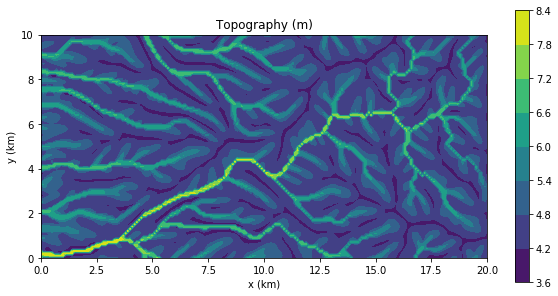

In [3]:
X = X/1.e3
Y = Y/1.e3
Z = np.reshape(np.log10(a),(ny,nx))
plt.figure()
fig,ax=plt.subplots(figsize=(10,10*yl/xl))
ax.set_aspect(1)
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.title('Topography (m)')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.show()

Note that the signature of any function is available through the docstrings.

In [4]:
fs.fastscape_set_erosional_parameters?